In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

SEED = 42


In [87]:
my_file = "quatazione_oro_12-22.csv"

oro_df = pd.read_csv(my_file)

oro_df.head()


,open,high,low,close,volume,timestamp,formattedOpen,formattedHigh,formattedLow,formattedClose,formattedVolume,formattedTimestamp,relatedNews,issue,redemption,highLow,peCode,newsPnacWithCsk,Date
0,40.35,40.66,40.25,40.33,0,2012-05-07T02:00:00+02:00,40.35,40.66,40.25,40.33,0,07/05/2012,NaN,0,1,[object Object],[object Object],NaN,2012-05-07
1,40.33,40.41,39.53,39.70,0,2012-05-08T02:00:00+02:00,40.33,40.41,39.53,39.70,0,08/05/2012,NaN,0,1,[object Object],[object Object],NaN,2012-05-08
2,39.71,39.75,39.18,39.54,0,2012-05-09T02:00:00+02:00,39.71,39.75,39.18,39.54,0,09/05/2012,NaN,0,1,[object Object],[object Object],NaN,2012-05-09
3,39.55,39.69,39.44,39.64,0,2012-05-10T02:00:00+02:00,39.55,39.69,39.44,39.64,0,10/05/2012,NaN,0,1,[object Object],[object Object],NaN,2012-05-10
4,39.64,39.66,39.18,39.33,0,2012-05-11T02:00:00+02:00,39.64,39.66,39.18,39.33,0,11/05/2012,NaN,0,1,[object Object],[object Object],NaN,2012-05-11


In [88]:
oro_df.shape

(2608, 19)

In [89]:
oro_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
open,2608.0,NaN,NaN,NaN,39.027439,7.165659,27.92,33.93,36.365,43.7625,60.51
high,2608.0,NaN,NaN,NaN,39.276664,7.228148,28.2,34.225,36.545,44.06,61.17
low,2608.0,NaN,NaN,NaN,38.775786,7.10049,27.63,33.68,36.17,43.51,58.64
close,2608.0,NaN,NaN,NaN,39.029797,7.172582,27.91,33.9275,36.355,43.7625,60.49
volume,2608.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
timestamp,2608,2608,2012-05-07T02:00:00+02:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
formattedOpen,2608.0,NaN,NaN,NaN,39.027439,7.165659,27.92,33.93,36.365,43.7625,60.51
formattedHigh,2608.0,NaN,NaN,NaN,39.276664,7.228148,28.2,34.225,36.545,44.06,61.17
formattedLow,2608.0,NaN,NaN,NaN,38.775786,7.10049,27.63,33.68,36.17,43.51,58.64
formattedClose,2608.0,NaN,NaN,NaN,39.029797,7.172582,27.91,33.9275,36.355,43.7625,60.49


In [90]:
oro_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'timestamp', 'formattedOpen',
       'formattedHigh', 'formattedLow', 'formattedClose', 'formattedVolume',
       'formattedTimestamp', 'relatedNews', 'issue', 'redemption', 'highLow',
       'peCode', 'newsPnacWithCsk', 'Date'],
      dtype='object')

In [91]:
oro_df.Date = pd.to_datetime(oro_df.Date)

In [92]:
(oro_df.Date.value_counts()>1).sum()

0

In [93]:
oro_df = oro_df.set_index("Date").loc[:,['open', 'high', 'low', 'close']]


In [94]:
oro_df.dtypes

open     float64
high     float64
low      float64
close    float64
dtype: object

In [95]:
oro_df.index

DatetimeIndex(['2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18',
               ...
               '2022-04-22', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29', '2022-05-02', '2022-05-03',
               '2022-05-04', '2022-05-05'],
              dtype='datetime64[ns]', name='Date', length=2608, freq=None)

In [96]:
oro_df.head()

,open,high,low,close
Date,,,,
2012-05-07,40.35,40.66,40.25,40.33
2012-05-08,40.33,40.41,39.53,39.70
2012-05-09,39.71,39.75,39.18,39.54
2012-05-10,39.55,39.69,39.44,39.64
2012-05-11,39.64,39.66,39.18,39.33


<AxesSubplot:xlabel='Date', ylabel='close'>

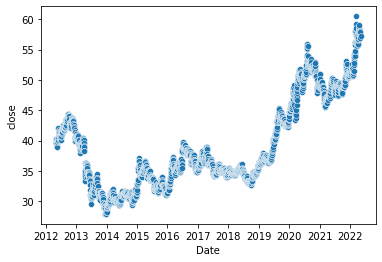

In [98]:
sns.scatterplot(x = oro_df.index, y = oro_df.close)

## Feature Engeneering

In [99]:
oro_df.head()

,open,high,low,close
Date,,,,
2012-05-07,40.35,40.66,40.25,40.33
2012-05-08,40.33,40.41,39.53,39.70
2012-05-09,39.71,39.75,39.18,39.54
2012-05-10,39.55,39.69,39.44,39.64
2012-05-11,39.64,39.66,39.18,39.33


In [100]:
oro_df["delta"] = oro_df.high - oro_df.low

In [101]:
oro_df["mean_oro"] = (oro_df.open + oro_df.close)/2

In [150]:
oro_df["giorno"] = oro_df.index.day
oro_df["mese"] = oro_df.index.month
oro_df["anno"] = oro_df.index.year

In [151]:
oro_df.head()

,open,high,low,close,delta,mean_oro,giorno,mese,anno
Date,,,,,,,,,
2012-05-07,40.35,40.66,40.25,40.33,0.41,40.340,7,5,2012
2012-05-08,40.33,40.41,39.53,39.70,0.88,40.015,8,5,2012
2012-05-09,39.71,39.75,39.18,39.54,0.57,39.625,9,5,2012
2012-05-10,39.55,39.69,39.44,39.64,0.25,39.595,10,5,2012
2012-05-11,39.64,39.66,39.18,39.33,0.48,39.485,11,5,2012


In [103]:
X = oro_df.index

In [153]:
X = oro_df.loc[:, ["giorno", "mese", "anno"]].to_numpy()
X

array([[   7,    5, 2012],
       [   8,    5, 2012],
       [   9,    5, 2012],
       ...,
       [   3,    5, 2022],
       [   4,    5, 2022],
       [   5,    5, 2022]], dtype=int64)

In [154]:
y = oro_df.reset_index().mean_oro

In [155]:
y

0       40.340
1       40.015
2       39.625
3       39.595
4       39.485
         ...  
2603    57.940
2604    57.405
2605    57.045
2606    56.995
2607    57.130
Name: mean_oro, Length: 2608, dtype: float64

In [157]:
X.shape, y.shape

((2608, 3), (2608,))

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1956, 3), (652, 3), (1956,), (652,))

In [160]:
linear_model = LinearRegression()

In [161]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [165]:
linear_model.coef_, linear_model.intercept_

(array([5.45978252e-04, 1.17823132e-01, 1.70211602e+00]), -3394.6338219214845)

In [164]:
linear_model.score(X_test, y_test)

0.5006899036328079

In [181]:
y_predicted = linear_model.predict(X)

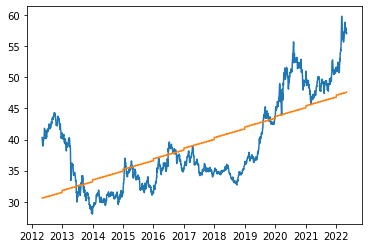

In [185]:
plt.plot(oro_df.index, y)
plt.plot(oro_df.index, y_predicted)

In [174]:
X[:,2]

array([2012, 2012, 2012, ..., 2022, 2022, 2022], dtype=int64)

In [179]:
oro_df.index[0].value, oro_df.index[1].value

(1336348800000000000, 1336435200000000000)